In [1]:
from qiskit import*
from qiskit.tools.visualization import*
from numpy import*
from matplotlib.pyplot import*

In [2]:
m12=7.39*10**-5
m13=2.525*10**-3
m23=m13
th12=0.5902
th23=0.8656
th13=0.1502
LE=linspace(0,1000,11)#(L/E)lib.pyplot import*
le=linspace(0,1200,121)

In [3]:
muon_counts=[]
electron_counts=[]
tau_counts=[]

In [4]:
def phi_1(E):
    return(2*(1.27*m12*E))
def phi_2(E):
    return(2*(1.27*m13*E))
def prob_t(E):
    return((cos(th13)**2)*((sin(2*th23))**2)*(sin(1.27*m23*E))**2)
def prob_e(E):
    return((sin(2*th13)**2)*((sin(th23))**2)*(sin(1.27*m23*E))**2) 
def prob_m(E):
    return(1-(cos(th13)**2)*((sin(2*th23))**2)*((sin(1.27*m23*E))**2)-(sin(2*th13)**2)*((sin(th23))**2)*(sin(1.27*m23*E))**2)

In [5]:
alpha=-0.6031
beta=-2.0125
gamma=0.7966
delta=1.0139
eps=0.7053
zeta=1.3599

In [22]:
PMNS=QuantumCircuit(2,name='PMNS')
PMNS.u(-1*alpha,0,0,0)
PMNS.u(-1*beta,0,0,1)
PMNS.cx(1,0)
PMNS.u(-1*gamma,0,0,0)
PMNS.u(-1*delta,0,0,1)
PMNS.cx(1,0)
PMNS.u(-1*eps,0,0,0)
PMNS.u(-1*zeta,0,0,1)
#PMNS.draw()
PMNS.to_gate()

In [23]:
PMNSd=QuantumCircuit(2,name='PMNSd')
PMNSd.u(eps,0,0,0)
PMNSd.u(zeta,0,0,1)
PMNSd.cx(1,0)
PMNSd.u(gamma,0,0,0)
PMNSd.u(delta,0,0,1)
PMNSd.cx(1,0)
PMNSd.u(alpha,0,0,0)
PMNSd.u(beta,0,0,1)

#PMNSd.draw()
PMNSd.to_gate()

In [24]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
qc=QuantumCircuit(qr,cr)
#circuit
backend=BasicAer.get_backend('qasm_simulator')
for E in LE:
    p=phi_1(E)
    q=phi_2(E)
    qc.x(qr[1])
    qc.append(PMNSd,[1,0])
    qc.u(0,0,q,qr[0])
    qc.u(0,0,p,qr[1])
    qc.append(PMNS,[1,0])
    qc.measure(qr[0],cr[0])
    qc.measure(qr[1],cr[1])
    counts=execute(qc,backend,shots=1024).result().get_counts()
    print(counts)
    qc.reset(qr[0])
    qc.reset(qr[1])   


{'10': 1024}
{'10': 927, '01': 91, '11': 6}
{'01': 372, '10': 630, '11': 22}
{'01': 668, '10': 323, '11': 33}
{'01': 882, '10': 91, '11': 51}
{'01': 972, '11': 52}
{'01': 897, '10': 98, '11': 29}
{'10': 371, '01': 627, '11': 26}
{'10': 683, '01': 333, '11': 8}
{'10': 940, '01': 84}
{'10': 1021, '11': 3}


In [14]:
qc.draw()

┌───┐┌────────┐┌──────────┐┌───────┐┌─┐     ┌───┐┌────────┐»
q110_0: ┤ X ├┤1       ├┤ U(0,0,0) ├┤1      ├┤M├─|0>─┤ X ├┤1       ├»
        └───┘│  PMNSd │├──────────┤│  PMNS │└╥┘ ┌─┐ └───┘│  PMNSd │»
q110_1: ─────┤0       ├┤ U(0,0,0) ├┤0      ├─╫──┤M├──|0>─┤0       ├»
             └────────┘└──────────┘└───────┘ ║  └╥┘      └────────┘»
  c2: 2/═════════════════════════════════════╩═══╩═════════════════»
                                             0   1                 »
«        ┌─────────────────┐┌───────┐┌─┐     ┌───┐┌────────┐┌─────────────────┐»
«q110_0: ┤ U(0,0,0.018771) ├┤1      ├┤M├─|0>─┤ X ├┤1       ├┤ U(0,0,0.037541) ├»
«        └┬────────────────┤│  PMNS │└╥┘ ┌─┐ └───┘│  PMNSd │└┬───────────────┬┘»
«q110_1: ─┤ U(0,0,0.64135) ├┤0      ├─╫──┤M├──|0>─┤0       ├─┤ U(0,0,1.2827) ├─»
«         └────────────────┘└───────┘ ║  └╥┘      └────────┘ └───────────────┘ »
«  c2: 2/═════════════════════════════╩═══╩════════════════════════════════════»
«                                     0   1                                    »
«        ┌───────┐┌─┐     ┌───┐┌────────┐┌─────────────────┐┌───────┐┌─┐     »
«q110_0: ┤1      ├┤M├─|0>─┤ X ├┤1       ├┤ U(0,0,0.056312) ├┤1      ├┤M├─|0>─»
«        │  PMNS │└╥┘ ┌─┐ └───┘│  PMNSd │└┬───────────────┬┘│  PMNS │└╥┘ ┌─┐ »
«q110_1: ┤0      ├─╫──┤M├──|0>─┤0       ├─┤ U(0,0,1.9241) ├─┤0      ├─╫──┤M├─»
«        └───────┘ ║  └╥┘      └────────┘ └───────────────┘ └───────┘ ║  └╥┘ »
«  c2: 2/══════════╩═══╩══════════════════════════════════════════════╩═══╩══»
«                  0   1                                              0   1  »
«        ┌───┐┌────────┐┌─────────────────┐┌───────┐┌─┐     ┌───┐┌────────┐»
«q110_0: ┤ X ├┤1       ├┤ U(0,0,0.075082) ├┤1      ├┤M├─|0>─┤ X ├┤1       ├»
«        └───┘│  PMNSd │└┬───────────────┬┘│  PMNS │└╥┘ ┌─┐ └───┘│  PMNSd │»
«q110_1: ─|0>─┤0       ├─┤ U(0,0,2.5654) ├─┤0      ├─╫──┤M├──|0>─┤0       ├»
«             └────────┘ └───────────────┘ └───────┘ ║  └╥┘      └────────┘»
«  c2: 2/════════════════════════════════════════════╩═══╩═════════════════»
«                                                    0   1                 »
«        ┌─────────────────┐┌───────┐┌─┐     ┌───┐┌────────┐┌────────────────┐»
«q110_0: ┤ U(0,0,0.093853) ├┤1      ├┤M├─|0>─┤ X ├┤1       ├┤ U(0,0,0.11262) ├»
«        └┬───────────────┬┘│  PMNS │└╥┘ ┌─┐ └───┘│  PMNSd │├───────────────┬┘»
«q110_1: ─┤ U(0,0,3.2067) ├─┤0      ├─╫──┤M├──|0>─┤0       ├┤ U(0,0,3.8481) ├─»
«         └───────────────┘ └───────┘ ║  └╥┘      └────────┘└───────────────┘ »
«  c2: 2/═════════════════════════════╩═══╩═══════════════════════════════════»
«                                     0   1                                   »
«        ┌───────┐┌─┐     ┌───┐┌────────┐┌────────────────┐┌───────┐┌─┐     »
«q110_0: ┤1      ├┤M├─|0>─┤ X ├┤1       ├┤ U(0,0,0.13139) ├┤1      ├┤M├─|0>─»
«        │  PMNS │└╥┘ ┌─┐ └───┘│  PMNSd │├───────────────┬┘│  PMNS │└╥┘ ┌─┐ »
«q110_1: ┤0      ├─╫──┤M├──|0>─┤0       ├┤ U(0,0,4.4894) ├─┤0      ├─╫──┤M├─»
«        └───────┘ ║  └╥┘      └────────┘└───────────────┘ └───────┘ ║  └╥┘ »
«  c2: 2/══════════╩═══╩═════════════════════════════════════════════╩═══╩══»
«                  0   1                                             0   1  »
«        ┌───┐┌────────┐┌────────────────┐┌───────┐┌─┐     ┌───┐┌────────┐»
«q110_0: ┤ X ├┤1       ├┤ U(0,0,0.15016) ├┤1      ├┤M├─|0>─┤ X ├┤1       ├»
«        └───┘│  PMNSd │├───────────────┬┘│  PMNS │└╥┘ ┌─┐ └───┘│  PMNSd │»
«q110_1: ─|0>─┤0       ├┤ U(0,0,5.1308) ├─┤0      ├─╫──┤M├──|0>─┤0       ├»
«             └────────┘└───────────────┘ └───────┘ ║  └╥┘      └────────┘»
«  c2: 2/═══════════════════════════════════════════╩═══╩═════════════════»
«                                                   0   1                 »
«        ┌────────────────┐┌───────┐┌─┐     ┌───┐┌────────┐┌────────────────┐»
«q110_0: ┤ U(0,0,0.16894) ├┤1      ├┤M├─|0>─┤ X ├┤1       ├┤ U(0,0,0.18771) ├»
«        ├───────────────┬┘│  PMNS │└╥┘ ┌─┐ └───┘│  PMNSd │├──────────

In [162]:
AC_t=prob_t(le)
AC_e=prob_e(le)
AC_m=prob_m(le)

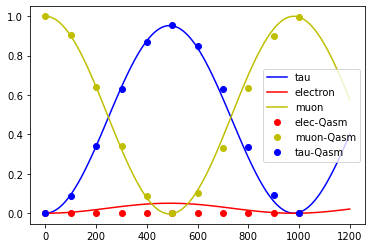

In [164]:
plot(le,AC_t,'-b',label='tau')
plot(le,AC_e,'-r',label='electron')
plot(le,AC_m,'-y',label='muon')
plot(LE,electron_counts,'or',label='elec-Qasm')
plot(LE,muon_counts,'oy',label='muon-Qasm')
plot(LE,tau_counts,'ob',label='tau-Qasm')
legend()